In [1]:
from train import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)

Current device: cuda


In [3]:
def lhs(size, lb=-1, rb=1):
    res = np.zeros(size)
    length = (rb - lb) / size
    for i in range(size):
        sub_lb = lb + length * i
        sub_rb = lb + length * (i + 1)
        res[i] = np.random.rand() * length + sub_lb
    return res
        

In [4]:
epochs = 5000
lr = 0.01

# alpha = np.random.uniform(low=0.005/np.pi, high=0.1/np.pi, size=1000)
# print(alpha)
alpha = np.random.uniform(low=-1, high=1, size=100)
beta = np.random.uniform(low=-1, high=1, size=100)
# alpha = -0.752
# beta = 0.932
# print("Alpha: {:.3f}, Beta: {:.3f}".format(alpha, beta))
# print(alpha)
# print(beta)
# loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse = train(epochs=epochs, lr=lr, i_size=0, b_size=2, f_size=100, zero_shot=False, alpha_list=alpha, beta_list=beta, low=-1, high=1, eqname='poisson')
loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse, val_losses, val_ood_losses = train(epochs=epochs, lr=lr, i_size=0, b_size=2, f_size=1, zero_shot=True, alpha_list=alpha, beta_list=beta, low=-10, high=10, eqname='poisson', load=False, load_data='models/poisson_zs_8000.data')
# loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse, val_losses, val_ood_losses= train(epochs=epochs, lr=lr, i_size=1, b_size=2, f_size=1, zero_shot=True, alpha_list=alpha, low=-1, high=1, eqname='burgers')
# loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse = train(epochs=epochs, lr=lr, i_size=100, b_size=100, f_size=10000, zero_shot=False, alpha_list=(0.01 / np.pi), low=-1, high=1, eqname='burgers')

Current device: cuda
Data generation completed
Validation | Loss_I: nan | Loss_B: 0.9352 | Loss_F: 0.2915
Validation OOD | Loss_I: nan | Loss_B: 1.1273 | Loss_F: 0.1273
alpha, beta: -0.920, -0.489 Val. NRMSE: 1.215 | alpha, beta: 1.232, 1.041 Val. OOD NRMSE: 1.202


C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 100 | Loss_I: nan | Loss_B: 0.9982 | Loss_F: 0.2047
Validation | Loss_I: nan | Loss_B: 0.9259 | Loss_F: 0.8640
Validation OOD | Loss_I: nan | Loss_B: 1.2398 | Loss_F: 1.1046
alpha, beta: -0.920, -0.489 Val. NRMSE: 1.127 | alpha, beta: 1.232, 1.041 Val. OOD NRMSE: 1.260
Epoch 200 | Loss_I: nan | Loss_B: 0.9110 | Loss_F: 0.1939
Validation | Loss_I: nan | Loss_B: 0.8854 | Loss_F: 1.9325
Validation OOD | Loss_I: nan | Loss_B: 1.6525 | Loss_F: 2.2315
alpha, beta: -0.920, -0.489 Val. NRMSE: 1.183 | alpha, beta: 1.232, 1.041 Val. OOD NRMSE: 1.285
Epoch 300 | Loss_I: nan | Loss_B: 0.8120 | Loss_F: 0.1876
Validation | Loss_I: nan | Loss_B: 0.8449 | Loss_F: 7.4433
Validation OOD | Loss_I: nan | Loss_B: 2.0219 | Loss_F: 3.1018
alpha, beta: -0.920, -0.489 Val. NRMSE: 1.204 | alpha, beta: 1.232, 1.041 Val. OOD NRMSE: 1.182
Epoch 400 | Loss_I: nan | Loss_B: 0.7220 | Loss_F: 0.1783
Validation | Loss_I: nan | Loss_B: 0.8260 | Loss_F: 11.1943
Validation OOD | Loss_I: nan | Loss_B: 2.3375 | Loss_F

Text(0, 0.5, 'Loss')

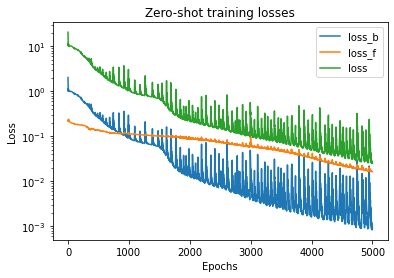

In [5]:
# plt.plot(loss_i, label='loss_i')
plt.plot(loss_b, label='loss_b')
plt.plot(loss_f, label='loss_f')
plt.plot(loss, label='loss')
plt.yscale('log')
plt.legend()
plt.title('Zero-shot training losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [13]:
print(val_losses['loss_f'][20:])
print(val_losses['loss'][20:])

[59.49156188964844, 101.2464828491211, 67.42106628417969, 60.992103576660156, 66.91155242919922, 77.34027099609375, 102.10313415527344, 90.6429214477539, 136.99012756347656, 79.26502990722656, 70.78150177001953, 82.05197143554688, 60.63121032714844, 87.38430786132812, 68.82476043701172, 56.57898712158203, 73.6003189086914, 130.52420043945312, 89.74595642089844, 73.99772644042969, 103.43405151367188, 68.46935272216797, 61.85348892211914, 106.03899383544922, 86.20143127441406, 74.95494079589844, 90.124267578125, 55.623470306396484, 80.99178314208984, 126.142578125]
[tensor(1.0775), tensor(1.0841), tensor(1.0753), tensor(1.0760), tensor(1.0800), tensor(1.0794), tensor(1.0789), tensor(1.0802), tensor(1.0824), tensor(1.0868), tensor(1.0835), tensor(1.0781), tensor(1.0893), tensor(1.0901), tensor(1.0759), tensor(1.0873), tensor(1.0973), tensor(1.1080), tensor(1.1079), tensor(1.1052), tensor(1.1081), tensor(1.1097), tensor(1.1066), tensor(1.1078), tensor(1.1159), tensor(1.1176), tensor(1.1195

Text(0, 0.5, 'Loss')

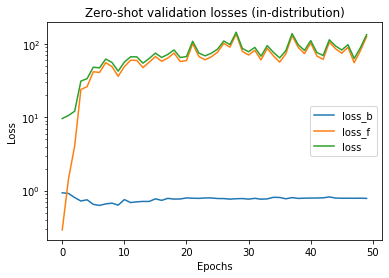

In [25]:

# plt.plot(val_losses['loss_i'], label='loss_i')
plt.plot(val_losses['loss_b'], label='loss_b')
plt.plot(val_losses['loss_f'], label='loss_f')
plt.plot(np.array(val_losses['loss_f']) + np.array(val_losses['loss_b']) * 10, label='loss')
plt.yscale('log')
plt.legend()
plt.title('Zero-shot validation losses (in-distribution)')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

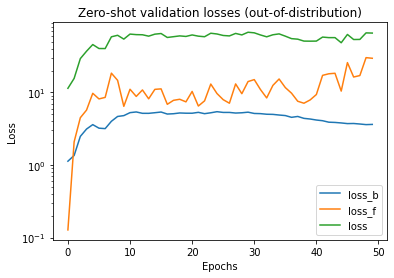

In [26]:

# plt.plot(val_losses['loss_i'], label='loss_i')
plt.plot(val_ood_losses['loss_b'], label='loss_b')
plt.plot(val_ood_losses['loss_f'], label='loss_f')
plt.plot(np.array(val_ood_losses['loss_f']) + np.array(val_ood_losses['loss_b']) * 10, label='loss')
plt.yscale('log')
plt.legend()
plt.title('Zero-shot validation losses (out-of-distribution)')
plt.xlabel('Epochs')
plt.ylabel('Loss')

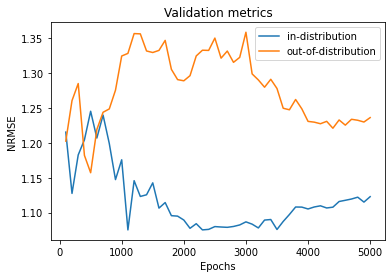

In [28]:
epochs = [5000 / len(val_loss) * i for i in range(1, len(val_loss) + 1)]
plt.plot(epochs, val_loss, label='in-distribution')
plt.plot(epochs, val_ood_loss, label='out-of-distribution')
# plt.yscale('log')
plt.title("Validation metrics")
plt.xlabel('Epochs')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

nrmse_df = pd.DataFrame(nrmse)
val_loss_df = pd.DataFrame(val_loss)
val_ood_loss_df = pd.DataFrame(val_ood_loss)
train_loss_df = pd.DataFrame({'loss_b': loss_b, 'loss_f': loss_f, 'loss': loss})

nrmse_df.to_csv('data/nrmse_burgers_zs.csv')
val_loss_df.to_csv('data/val_loss_burgers_zs.csv')
val_ood_loss_df.to_csv('data/val_ood_loss_burgers_zs.csv')
train_loss_df.to_csv('data/train_loss_burgers_zs.csv')

## Results - Case 1

In [3]:
from maml import *

In [57]:
alpha = -1.26
beta = 1.48

In [59]:
loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse, val_losses, val_ood_losses = train(epochs=2000, lr=0.01, i_size=0, b_size=2, f_size=100, zero_shot=False, alpha_list=alpha, beta_list=beta, low=-1, high=1, eqname='poisson', load=False, load_data='models/poisson_zs_8000.data')

Current device: cuda
Data generation completed
Epoch 100 | Loss_I: nan | Loss_B: 0.0328 | Loss_F: 0.8596
NRMSE: 0.0357
Epoch 200 | Loss_I: nan | Loss_B: 0.0168 | Loss_F: 0.4309
NRMSE: 0.0385
Epoch 300 | Loss_I: nan | Loss_B: 0.0116 | Loss_F: 0.2878
NRMSE: 0.0259
Epoch 400 | Loss_I: nan | Loss_B: 0.0088 | Loss_F: 0.2161
NRMSE: 0.0416
Epoch 500 | Loss_I: nan | Loss_B: 0.0070 | Loss_F: 0.1730
NRMSE: 0.0417
Epoch 600 | Loss_I: nan | Loss_B: 0.0060 | Loss_F: 0.1444
NRMSE: 0.0319
Epoch 700 | Loss_I: nan | Loss_B: 0.0052 | Loss_F: 0.1239
NRMSE: 0.0419
Epoch 800 | Loss_I: nan | Loss_B: 0.0046 | Loss_F: 0.1085
NRMSE: 0.0419
Epoch 900 | Loss_I: nan | Loss_B: 0.0041 | Loss_F: 0.0965
NRMSE: 0.0366
Epoch 1000 | Loss_I: nan | Loss_B: 0.0037 | Loss_F: 0.0869
NRMSE: 0.0424
Epoch 1100 | Loss_I: nan | Loss_B: 0.0035 | Loss_F: 0.0791
NRMSE: 0.0470
Epoch 1200 | Loss_I: nan | Loss_B: 0.0032 | Loss_F: 0.0725
NRMSE: 0.0423
Epoch 1300 | Loss_I: nan | Loss_B: 0.0029 | Loss_F: 0.0670
NRMSE: 0.0422
Epoch 1400 | 

In [71]:
model3 = PINN(20, 5, dim=1, param_num=2, zero_shot=True)
model3.load_state_dict(torch.load('models/poisson_zs_2000_ref.data'))
model3.to(device)
model2 = PINN(20, 5, dim=1, param_num=2, zero_shot=True)
model2.load_state_dict(torch.load('models/model_used/maml_poisson_high1_5000.data'))
model2.to(device)

PINN(
  (module1): Sequential(
    (0): Linear(in_features=3, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [72]:
task = alpha, beta
maml = MAML(5, 0.01, 0.0005, 1,2,  1, -1, 1, eqname='poisson', zero_shot=True, load=False, modelpath='models/model_ref/burgers_zs_1000_ref.data')
phi, _, _, _, _, _, _ = maml._inner_loop(model2.state_dict(), task, train=True)
model_adapted = deepcopy(model2)
model_adapted.load_state_dict(phi)

Initializing MAML-PINN model
Current device:  cuda
cuda
Zero shot mode is True
Finished initialization of MAML-PINN model
Trained model will be saved by None


<All keys matched successfully>

In [73]:
test_x = np.linspace(-1, 1, num=100).reshape(-1, 1)
test_alpha = np.full((100, 1), alpha)
test_beta = np.full((100, 1), beta)

X = test_x

Y = np.sin(test_alpha * X) + np.cos(test_beta * X) + 0.1 * X
test_in = np.hstack((test_x, test_alpha, test_beta))
test_in_ = test_x
test_u_ = model(torch.Tensor(test_in_).to(device))
test_u = model3(torch.Tensor(test_in).to(device))
# test_in = test_x
test_u_2 = model2(torch.Tensor(test_in).to(device))
test_u_3 = model_adapted(torch.Tensor(test_in).to(device))

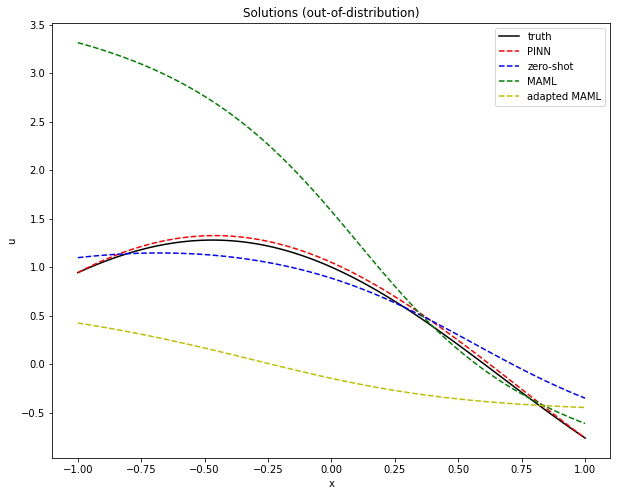

In [74]:
C_ = test_u_.cpu().detach().numpy()
C = test_u.cpu().detach().numpy()
C2 = test_u_2.cpu().detach().numpy()
C3 = test_u_3.cpu().detach().numpy()
plt.figure(figsize=(10, 8))
plt.plot(X, Y, 'k', label='truth')
plt.plot(X, C_, 'r--', label='PINN')
plt.plot(X, C, 'b--', label='zero-shot')
plt.plot(X, C2, 'g--', label='MAML')
plt.plot(X, C3, 'y--', label='adapted MAML')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Solutions (out-of-distribution)')
plt.legend()

In [14]:
def compute_nrmse(C, Y):
    return np.sqrt(np.sum((C-Y)**2)/np.sum(C**2))

In [15]:
compute_nrmse(C_, Y)

0.009578262182410877

In [55]:
nrmse_test_zs = []
nrmse_test_maml = []
nrmse_test_maml_adapted = []
nrmse_test_pinn = []

alpha_val = np.hstack((np.random.uniform(low=-1.5, high=-1, size=5), np.random.uniform(low=1, high=1.5, size=5)))
beta_val = np.hstack((np.random.uniform(low=-1.5, high=-1, size=5), np.random.uniform(low=1, high=1.5, size=5)))

for alpha, beta in zip(alpha_val, beta_val):
    loss_i, loss_b, loss_f, loss, model_, val_loss, val_ood_loss, nrmse, _, _ = train(epochs=1000, lr=0.01, i_size=0, b_size=2, f_size=100, zero_shot=False, alpha_list=alpha, beta_list=beta, low=-1, high=1, eqname='poisson')
    test_x = np.linspace(-1, 1, num=100).reshape(-1, 1)
    test_alpha = np.full((100, 1), alpha)
    test_beta = np.full((100, 1), beta)
    X = test_x
    Y = np.sin(test_alpha * X) + np.cos(test_beta * X) + 0.1 * X
    test_in = np.hstack((test_x, test_alpha, test_beta))
    test_u_ = model_(torch.Tensor(test_x).to(device))
    test_u = model3(torch.Tensor(test_in).to(device))
    test_u_2 = model2(torch.Tensor(test_in).to(device))
    test_u_3 = model_adapted(torch.Tensor(test_in).to(device))
    C_ = test_u_.cpu().detach().numpy()
    C = test_u.cpu().detach().numpy()
    C2 = test_u_2.cpu().detach().numpy()
    C3 = test_u_3.cpu().detach().numpy()
    nrmse_test_pinn.append(compute_nrmse(C_, Y))
    nrmse_test_zs.append(compute_nrmse(C, Y))
    nrmse_test_maml.append(compute_nrmse(C2, Y))
    nrmse_test_maml_adapted.append(compute_nrmse(C3, Y))
   
mean_nrmse_pinn = np.mean(np.array(nrmse_test_pinn))                    
mean_nrmse_zs = np.mean(np.array(nrmse_test_zs))
mean_nrmse_maml = np.mean(np.array(nrmse_test_maml))
mean_nrmse_adapt_maml = np.mean(np.array(nrmse_test_maml_adapted))

std_nrmse_pinn = np.std(np.array(nrmse_test_pinn))                    
std_nrmse_zs = np.std(np.array(nrmse_test_zs))
std_nrmse_maml = np.std(np.array(nrmse_test_maml))
std_nrmse_adapt_maml = np.std(np.array(nrmse_test_maml_adapted))
    
high_nrmse_pinn = mean_nrmse_pinn + 1.96 * std_nrmse_pinn                    
high_nrmse_zs = mean_nrmse_zs + 1.96 * std_nrmse_zs
high_nrmse_maml = mean_nrmse_maml + 1.96 * std_nrmse_maml
high_nrmse_adapt_maml = mean_nrmse_adapt_maml + 1.96 * std_nrmse_adapt_maml

low_nrmse_pinn = mean_nrmse_pinn - 1.96 * std_nrmse_pinn                    
low_nrmse_zs = mean_nrmse_zs - 1.96 * std_nrmse_zs
low_nrmse_maml = mean_nrmse_maml - 1.96 * std_nrmse_maml
low_nrmse_adapt_maml = mean_nrmse_adapt_maml - 1.96 * std_nrmse_adapt_maml
    


Current device: cuda
Data generation completed


C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 100 | Loss_I: nan | Loss_B: 0.0385 | Loss_F: 0.5127
NRMSE: 0.0139
Epoch 200 | Loss_I: nan | Loss_B: 0.0193 | Loss_F: 0.2569
NRMSE: 0.0408
Epoch 300 | Loss_I: nan | Loss_B: 0.0129 | Loss_F: 0.1713
NRMSE: 0.0294
Epoch 400 | Loss_I: nan | Loss_B: 0.0097 | Loss_F: 0.1286
NRMSE: 0.0296
Epoch 500 | Loss_I: nan | Loss_B: 0.0077 | Loss_F: 0.1029
NRMSE: 0.0271
Epoch 600 | Loss_I: nan | Loss_B: 0.0065 | Loss_F: 0.0858
NRMSE: 0.0292
Epoch 700 | Loss_I: nan | Loss_B: 0.0056 | Loss_F: 0.0735
NRMSE: 0.0293
Epoch 800 | Loss_I: nan | Loss_B: 0.0049 | Loss_F: 0.0644
NRMSE: 0.0288
Epoch 900 | Loss_I: nan | Loss_B: 0.0044 | Loss_F: 0.0572
NRMSE: 0.0294
Epoch 1000 | Loss_I: nan | Loss_B: 0.0039 | Loss_F: 0.0515
NRMSE: 0.0294
Current device: cuda
Data generation completed
Epoch 100 | Loss_I: nan | Loss_B: 0.0261 | Loss_F: 0.6374
NRMSE: 0.0149
Epoch 200 | Loss_I: nan | Loss_B: 0.0131 | Loss_F: 0.3196
NRMSE: 0.0219
Epoch 300 | Loss_I: nan | Loss_B: 0.0087 | Loss_F: 0.2134
NRMSE: 0.0219
Epoch 400 | Loss

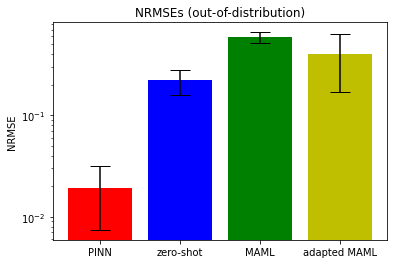

In [56]:
x = np.arange(4)
methods = ['PINN', 'zero-shot', 'MAML', 'adapted MAML']
values = [mean_nrmse_pinn, mean_nrmse_zs, mean_nrmse_maml, mean_nrmse_adapt_maml]
yerr = [(high_nrmse_pinn - low_nrmse_pinn) / np.sqrt(10), (high_nrmse_zs - low_nrmse_zs) / np.sqrt(10), (high_nrmse_maml - low_nrmse_maml) / np.sqrt(10), (high_nrmse_adapt_maml - low_nrmse_adapt_maml)/ np.sqrt(10)] 
colors = ['r', 'b', 'g', 'y']

plt.bar(x, values, color=colors, yerr=yerr, capsize=10)
plt.xticks(x, methods)
plt.yscale('log')
plt.ylabel('NRMSE')
plt.title('NRMSEs (out-of-distribution)')

plt.show()

In [50]:
nrmse_test_zs

[0.011851386923644139,
 0.004255329990108116,
 0.009447671177513897,
 0.0021978769461780652,
 0.057159317418351695,
 0.029279449019558798,
 0.002130938952578639,
 0.017873199533253916,
 0.01847369483084865,
 0.005516524325457782]

## Results - Case 2

In [76]:
model3 = PINN(20, 5, dim=1, param_num=2, zero_shot=True)
model3.load_state_dict(torch.load('models/poisson_zs_1000_ref_case2.data'))
model3.to(device)
model2 = PINN(20, 5, dim=1, param_num=2, zero_shot=True)
model2.load_state_dict(torch.load('models/model_used/maml_poisson_high10_5000.data'))
model2.to(device)

PINN(
  (module1): Sequential(
    (0): Linear(in_features=3, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [77]:
from maml import *

In [80]:
alpha = -0.752
beta = 0.932

In [81]:
task = alpha, beta
maml = MAML(5, 0.01, 0.0005, 1,2,  1, -10, 10, eqname='poisson', zero_shot=True, load=False, modelpath='models/model_ref/burgers_zs_1000_ref.data')
phi, _, _, _, _, _, _ = maml._inner_loop(model2.state_dict(), task, train=True)
model_adapted = deepcopy(model2)
model_adapted.load_state_dict(phi)

Initializing MAML-PINN model
Current device:  cuda
cuda
Zero shot mode is True
Finished initialization of MAML-PINN model
Trained model will be saved by None


<All keys matched successfully>

In [84]:
loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse, val_losses, val_ood_losses = train(epochs=1000, lr=0.01, i_size=0, b_size=2, f_size=100, zero_shot=False, alpha_list=alpha, beta_list=beta, low=-10, high=10, eqname='poisson')

Current device: cuda
Data generation completed
Epoch 100 | Loss_I: nan | Loss_B: 0.0307 | Loss_F: 0.4248
NRMSE: 1.3534
Epoch 200 | Loss_I: nan | Loss_B: 0.0161 | Loss_F: 0.3121
NRMSE: 1.1484
Epoch 300 | Loss_I: nan | Loss_B: 0.0114 | Loss_F: 0.2548
NRMSE: 1.1123
Epoch 400 | Loss_I: nan | Loss_B: 0.0086 | Loss_F: 0.2241
NRMSE: 1.1000
Epoch 500 | Loss_I: nan | Loss_B: 0.0073 | Loss_F: 0.2051
NRMSE: 1.1038
Epoch 600 | Loss_I: nan | Loss_B: 0.0061 | Loss_F: 0.1919
NRMSE: 1.0870
Epoch 700 | Loss_I: nan | Loss_B: 0.0052 | Loss_F: 0.1810
NRMSE: 1.0686
Epoch 800 | Loss_I: nan | Loss_B: 0.0049 | Loss_F: 0.1723
NRMSE: 1.0680
Epoch 900 | Loss_I: nan | Loss_B: 0.0044 | Loss_F: 0.1652
NRMSE: 1.0588
Epoch 1000 | Loss_I: nan | Loss_B: 0.0039 | Loss_F: 0.1590
NRMSE: 1.0517


In [85]:
test_x = np.linspace(-10, 10, num=100).reshape(-1, 1)
# test_alpha = np.full((100, 1), alpha[2])
# test_beta = np.full((100, 1), beta[2])
alpha = -0.752
beta = 0.932
test_alpha = np.full((100, 1), alpha)
test_beta = np.full((100, 1), beta)
test_in = np.hstack((test_x, test_alpha, test_beta))
# test_in = test_x
test_u_ = model(torch.Tensor(test_x).to(device))
test_u = model3(torch.Tensor(test_in).to(device))
X = test_x

Y = np.sin(test_alpha * X) + np.cos(test_beta * X) + 0.1 * X


In [86]:
test_x = np.linspace(-10, 10, num=100).reshape(-1, 1)
test_in = np.hstack((test_x, test_alpha, test_beta))
# test_in = test_x
test_u = model3(torch.Tensor(test_in).to(device))
test_u_2 = model2(torch.Tensor(test_in).to(device))
test_u_3 = model_adapted(torch.Tensor(test_in).to(device))

Text(0.5, 1.0, 'Solutions (in-distribution)')

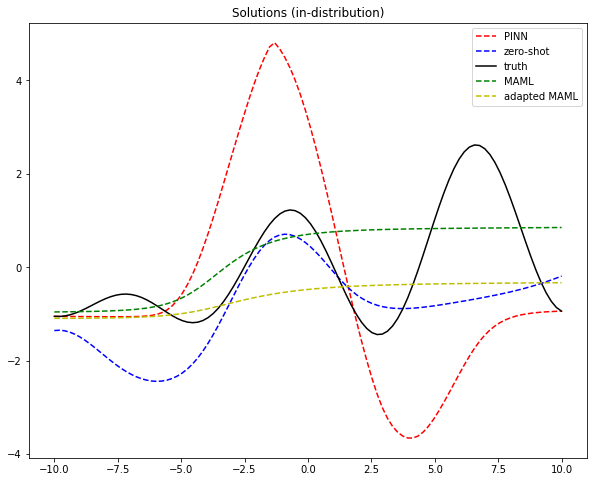

In [89]:
C_ = test_u_.cpu().detach().numpy()
C = test_u.cpu().detach().numpy()
C2 = test_u_2.cpu().detach().numpy()
C3 = test_u_3.cpu().detach().numpy()
plt.figure(figsize=(10, 8))
plt.plot(X, C_, 'r--', label='PINN')
plt.plot(X, C, 'b--', label='zero-shot')
plt.plot(X, Y, 'k', label='truth')
plt.plot(X, C2, 'g--', label='MAML')
plt.plot(X, C3, 'y--', label='adapted MAML')
plt.legend()
plt.title('Solutions (in-distribution)')
# plt.colorbar()

In [90]:
np.sqrt(np.sum( (Y-C) ** 2) / np.sum( C ** 2 ))

1.0941419365045773

In [92]:
nrmse_test_zs = []
nrmse_test_maml = []
nrmse_test_maml_adapted = []
nrmse_test_pinn = []

alpha_val = np.random.uniform(low=-1, high=1, size=10)
beta_val = np.random.uniform(low=-1, high=1, size=10)

for alpha, beta in zip(alpha_val, beta_val):
    loss_i, loss_b, loss_f, loss, model_, val_loss, val_ood_loss, nrmse = train(epochs=1000, lr=0.01, i_size=0, b_size=2, f_size=100, zero_shot=False, alpha_list=alpha, beta_list=beta, low=-10, high=10, eqname='poisson')
    test_x = np.linspace(-1, 1, num=100).reshape(-1, 1)
    test_alpha = np.full((100, 1), alpha)
    test_beta = np.full((100, 1), beta)
    X = test_x
    Y = np.sin(test_alpha * X) + np.cos(test_beta * X) + 0.1 * X
    test_in = np.hstack((test_x, test_alpha, test_beta))
    test_u_ = model_(torch.Tensor(test_x).to(device))
    test_u = model3(torch.Tensor(test_in).to(device))
    test_u_2 = model2(torch.Tensor(test_in).to(device))
    test_u_3 = model_adapted(torch.Tensor(test_in).to(device))
    C_ = test_u_.cpu().detach().numpy()
    C = test_u.cpu().detach().numpy()
    C2 = test_u_2.cpu().detach().numpy()
    C3 = test_u_3.cpu().detach().numpy()
    nrmse_test_pinn.append(compute_nrmse(C_, Y))
    nrmse_test_zs.append(compute_nrmse(C, Y))
    nrmse_test_maml.append(compute_nrmse(C2, Y))
    nrmse_test_maml_adapted.append(compute_nrmse(C3, Y))
    
mean_nrmse_pinn = np.mean(np.array(nrmse_test_pinn))                    
mean_nrmse_zs = np.mean(np.array(nrmse_test_zs))
mean_nrmse_maml = np.mean(np.array(nrmse_test_maml))
mean_nrmse_adapt_maml = np.mean(np.array(nrmse_test_maml_adapted))

std_nrmse_pinn = np.std(np.array(nrmse_test_pinn))                    
std_nrmse_zs = np.std(np.array(nrmse_test_zs))
std_nrmse_maml = np.std(np.array(nrmse_test_maml))
std_nrmse_adapt_maml = np.std(np.array(nrmse_test_maml_adapted))
    
high_nrmse_pinn = mean_nrmse_pinn + 1.96 * std_nrmse_pinn                    
high_nrmse_zs = mean_nrmse_zs + 1.96 * std_nrmse_zs
high_nrmse_maml = mean_nrmse_maml + 1.96 * std_nrmse_maml
high_nrmse_adapt_maml = mean_nrmse_adapt_maml + 1.96 * std_nrmse_adapt_maml

low_nrmse_pinn = mean_nrmse_pinn - 1.96 * std_nrmse_pinn                    
low_nrmse_zs = mean_nrmse_zs - 1.96 * std_nrmse_zs
low_nrmse_maml = mean_nrmse_maml - 1.96 * std_nrmse_maml
low_nrmse_adapt_maml = mean_nrmse_adapt_maml - 1.96 * std_nrmse_adapt_maml

Current device: cuda
Data generation completed


C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 100 | Loss_I: nan | Loss_B: 0.1084 | Loss_F: 0.1239
NRMSE: 0.9270
Epoch 200 | Loss_I: nan | Loss_B: 0.0542 | Loss_F: 0.1084
NRMSE: 0.9248
Epoch 300 | Loss_I: nan | Loss_B: 0.0361 | Loss_F: 0.1028
NRMSE: 0.9221
Epoch 400 | Loss_I: nan | Loss_B: 0.0271 | Loss_F: 0.0996
NRMSE: 0.9194
Epoch 500 | Loss_I: nan | Loss_B: 0.0217 | Loss_F: 0.0975
NRMSE: 0.9165
Epoch 600 | Loss_I: nan | Loss_B: 0.0181 | Loss_F: 0.0958
NRMSE: 0.9130
Epoch 700 | Loss_I: nan | Loss_B: 0.0155 | Loss_F: 0.0944
NRMSE: 0.9066
Epoch 800 | Loss_I: nan | Loss_B: 0.0135 | Loss_F: 0.0927
NRMSE: 0.8892
Epoch 900 | Loss_I: nan | Loss_B: 0.0120 | Loss_F: 0.0900
NRMSE: 0.8499
Epoch 1000 | Loss_I: nan | Loss_B: 0.0108 | Loss_F: 0.0861
NRMSE: 0.8317


ValueError: too many values to unpack (expected 8)

## Result - Case 3

In [ ]:
from burgers import *

In [ ]:

model = PINN(20, 8, dim=2, param_num=1, zero_shot=True)
model.load_state_dict(torch.load('models/burgers_zs_4000.data'))
model.to(device)


In [ ]:
model_maml = PINN(20, 8, dim=2, param_num=1, zero_shot=True)
model_maml.load_state_dict(torch.load('models/maml_burgers_from_scratch_4000.data'))
model_maml.to(device)

In [ ]:
vtn = 101
vxn = 101
nu = 0.01 / np.pi
vx = np.linspace(-1, 1, vxn)
vt = np.linspace(0, 1, vtn)
x, t = np.meshgrid(vx, vt)
x = x.reshape(-1, 1)
t = t.reshape(-1, 1)
alpha = np.full((x.shape), nu)
pred = model(torch.Tensor(np.hstack((x, t, alpha))).to(device)).detach().cpu().numpy()
# pred = model(torch.Tensor(np.hstack((x, t))).to(device)).detach().cpu().numpy()
truth = burgers_viscous_time_exact1(nu, vxn, vx, vtn, vt).T

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x, t, c=pred, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Zero-shot')
plt.colorbar()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x, t, c=truth, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Truth')
plt.colorbar()

In [ ]:
from maml import *

In [ ]:
maml = MAML(5, 0.01, 0.0005, 1,2, 1, -1, 1, eqname='burgers', zero_shot=True, load=False, modelpath='models/model_ref/burgers_zs_1000_ref.data')
phi, _, inner_loss_i, inner_loss_b, inner_loss_f, inner_loss, nrmse_batch = maml._inner_loop(model_maml.state_dict(), nu, train=False)
model_adapted = deepcopy(model)
model_adapted.load_state_dict(phi)
pred_maml = model_maml(torch.Tensor(np.hstack((x, t, alpha))).to(device)).detach().cpu().numpy()
pred_maml_adapted = model_adapted(torch.Tensor(np.hstack((x, t, alpha))).to(device)).detach().cpu().numpy()

In [ ]:
nrmse_batch

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x, t, c=pred_maml, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('MAML')
plt.colorbar()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x, t, c=pred_maml_adapted, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('MAML-adapted')
plt.colorbar()

In [ ]:
# loss_i, loss_b, loss_f, loss, model_pinn, val_loss, val_ood_loss, nrmse = train(epochs=2000, lr=lr, i_size=100, b_size=100, f_size=10000, zero_shot=False, alpha_list=0.01/np.pi, low=-1, high=1, eqname='burgers')

In [ ]:
pred_pinn = model_pinn(torch.Tensor(np.hstack((x, t))).to(device)).detach().cpu().numpy()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x, t, c=pred_pinn, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Single PINN')
plt.colorbar()

In [ ]:
idx = 75
print(vt[idx])
x_025 = np.linspace(-1, 1, 101).reshape(-1, 1)
t_025 = np.full((x_025.shape), idx / 100)

pred_ = model(torch.Tensor(np.hstack((x_025, t_025, np.full((x_025.shape), nu)))).to(device)).detach().cpu().numpy()
pred_maml_ = model_maml(torch.Tensor(np.hstack((x_025, t_025, np.full((x_025.shape), nu)))).to(device)).detach().cpu().numpy()
pred_pinn_ = model_pinn(torch.Tensor(np.hstack((x_025, t_025))).to(device)).detach().cpu().numpy()
task = 0.01 / np.pi
# test_in = np.hstack((x, t, alpha))
test_in_t = np.hstack((x_025, t_025, np.full((x_025.shape), task)))

model_adapted = deepcopy(model)
model_adapted.load_state_dict(phi)
# Y2 = model_adapted(torch.Tensor(test_in).to(device)).detach().cpu().numpy()
Y2_t = model_adapted(torch.Tensor(test_in_t).to(device)).detach().cpu().numpy()

In [ ]:
plt.plot(truth[idx, :], 'k', linewidth=3, label='truth')
plt.plot(pred_, 'b--', linewidth=3, label='zero-shot')
plt.plot(pred_maml_, 'g--', linewidth=3, label='MAML')
plt.plot(pred_pinn_, 'r--', linewidth=3, label='PINN')
plt.plot(Y2_t, 'y--', linewidth=3, label='MAML-adapted')
plt.legend()
plt.title('t={}'.format(vt[idx]))

In [ ]:
np.sqrt(np.sum((pred-truth.reshape(-1, 1)) ** 2) / np.sum(pred ** 2))

In [ ]:
np.mean(np.abs(pred-truth.reshape(-1, 1)))

In [ ]:
plt.scatter(x, t, c=((pred.reshape(101, 101) - truth) ** 2).reshape(-1, 1), cmap='seismic')
plt.colorbar()